In [ ]:
import pandas as pd
import plotly.express as px

Getting the data.

In [59]:
final_df_years = pd.read_json('../../queried/OC/group_by_year/normal.json')
final_df_journal = pd.read_json('../../queried/OC/group_by_year/by_journal.json')

Getting the data of the biggest journal of DOAJ.

In [ ]:
group_journals = final_df_journal.groupby(['title'])['cited', 'citing', 'citations_to_DOAJ', 'cited_by_DOAJ'].sum()

PLoS ONE is the biggest journal of DOAJ in terms of the number of all types of citations.

In [ ]:
group_journals.idxmax()

In [ ]:
final_df_journal_1 = final_df_journal[final_df_journal['journal'] == group_journals['citing'].idxmax()]

Plotting the comparison between the citing and cited numbers.

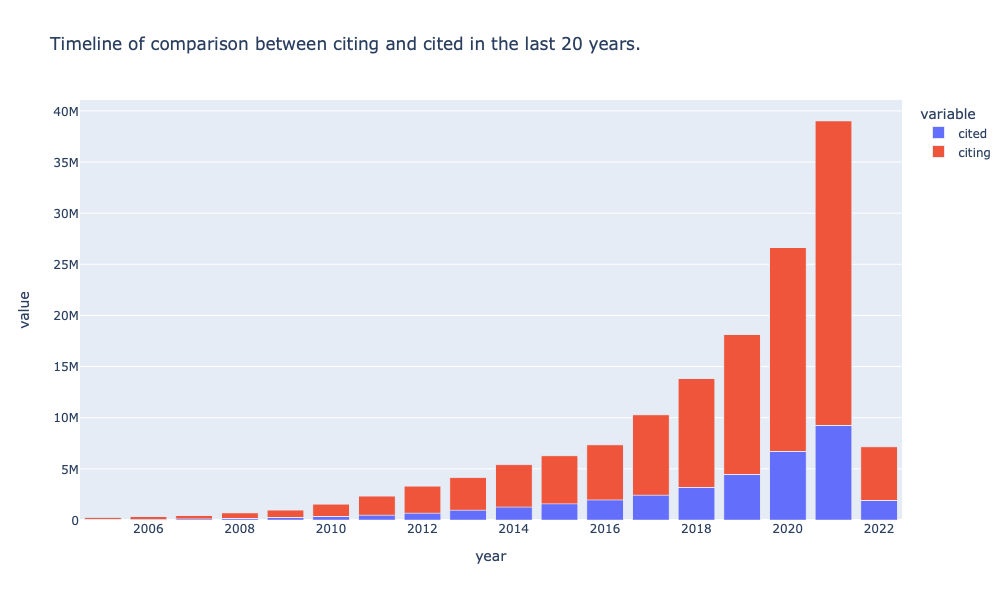

In [53]:
comp_years_fig_big = px.bar(final_df_years[-20:-2], x='year', y=['cited','citing'], 
             title='Timeline of comparison between citing and cited in the last 20 years.',
             height=600)
comp_years_fig_big.show()

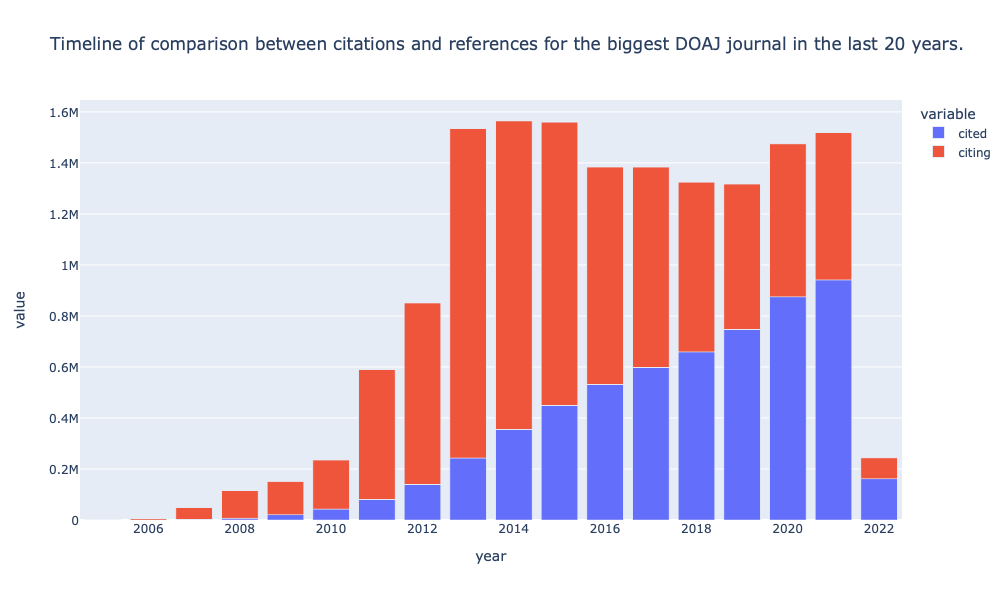

In [54]:
comp_years_fig_journal = px.bar(final_df_journal_1[-20:-2], x='year', y=['cited','citing'], 
             title='Timeline of comparison between citations and references for the biggest DOAJ journal in the last 20 years.',
             height=600)
comp_years_fig_journal.show()

Plotting the timeline of the percetange of citations coming and going to DOAJ.

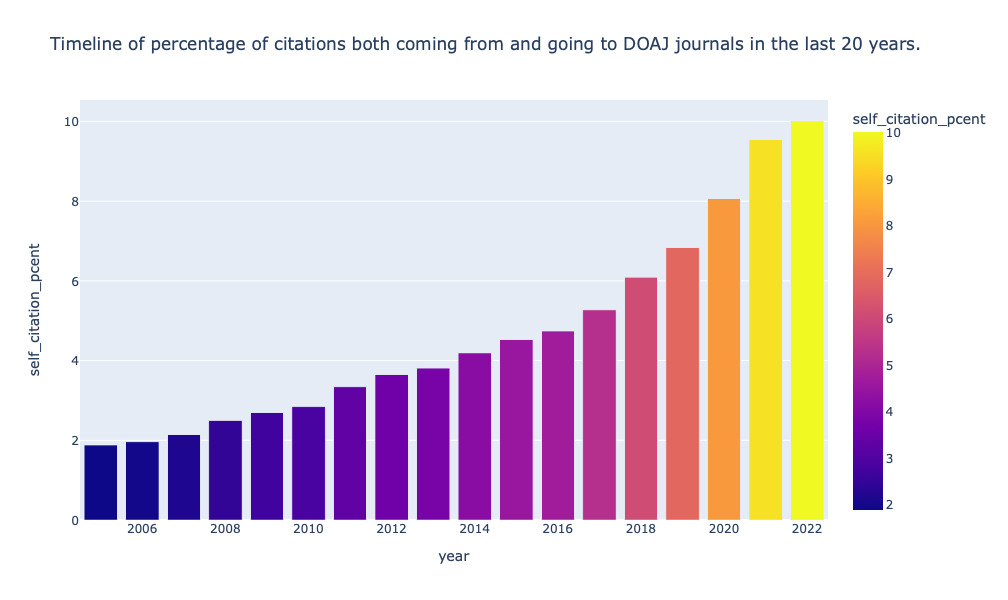

In [55]:
cit_years_fig = px.bar(final_df_years[-20:-2], x='year', y='self_citation_pcent', 
             hover_data=['self_citation_pcent'],
             title='Timeline of percentage of citations both coming from and going to DOAJ journals in the last 20 years.', 
             color='self_citation_pcent',
             height=600)
cit_years_fig.show()

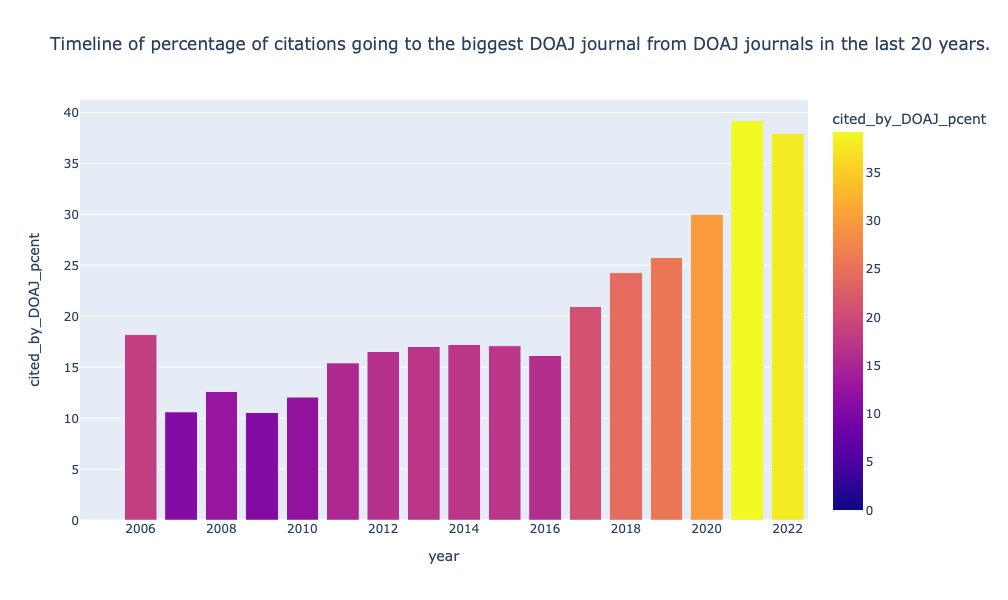

In [56]:
cit_years_fig_journal = px.bar(final_df_journal_1[-20:-2], x='year', y='cited_by_DOAJ_pcent', 
             hover_data=['cited_by_DOAJ_pcent'],
             title='Timeline of percentage of citations going to the biggest DOAJ journal from DOAJ journals in the last 20 years.', 
             color='cited_by_DOAJ_pcent',
             height=600)
cit_years_fig_journal.show()

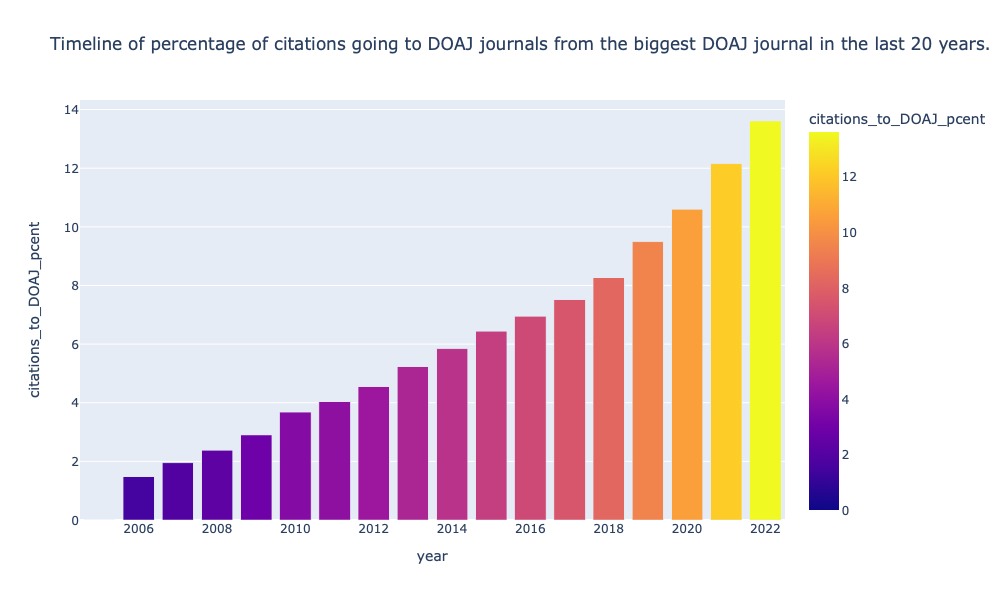

In [57]:
cit_years_fig_journal = px.bar(final_df_journal_1[-20:-2], x='year', y='citations_to_DOAJ_pcent', 
             hover_data=['citations_to_DOAJ_pcent'],
             title='Timeline of percentage of citations going to DOAJ journals from the biggest DOAJ journal in the last 20 years.', 
             color='citations_to_DOAJ_pcent',
             height=600)
cit_years_fig_journal.show()